In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


In [3]:
data = pd.read_csv('category_feature_level.csv')

/Library/Python/2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
features = list(data.drop('fico_level', axis=1).columns)

In [4]:
data

,channel,state,property_type,purpose,occupy_sts,seller,servicer,frst_pay_dt,num_borrowers,delinquency_sts,units,fico_level
0,R,IA,SF,C,O,Other sellers,NATIONSTARMTGELLC,201505,1,0,1,very_good
1,B,NE,SF,N,O,Other sellers,Other servicers,201504,1,0,1,exceptional
2,R,IL,SF,N,O,Other sellers,Other servicers,201505,1,0,1,very_good
3,R,IA,SF,N,O,Other sellers,Other servicers,201504,2,0,1,very_good
4,R,FL,MH,N,S,Other sellers,ARVESTCENTRALMTGECO,201503,2,0,1,very_good
5,R,TN,SF,C,O,Other sellers,Other servicers,201504,1,0,1,good
6,R,MN,SF,C,O,Other sellers,Other servicers,201503,2,0,1,good
7,R,MO,SF,N,O,Other sellers,Other servicers,201504,2,0,1,very_good
8,R,TX,SF,P,O,Other sellers,Other servicers,201504,2,0,1,very_good
9,R,NC,SF,C,O,Other sellers,Other servicers,201503,2,0,1,good


In [7]:
def percent_categorical(item, df, grouper) :
    # plot categorical responses to an item ('column name')
    # by percent by group ('diff column name w categorical data')
    # select a data frame 

    # create df of item grouped by status
    grouped = (df.groupby(grouper)[item]
    # convert to percentage by group rather than total count
                .value_counts(normalize=True)
                # rename column 
                .rename('percentage')
                # multiple by 100 for easier interpretation
                .mul(100)
                # change order from value to name
                .reset_index()
            .sort_values(item))

    # create plot
    plt.figure(figsize=(20,10))
    PercPlot = sns.barplot(x=item,
                         y='percentage',
                         hue=grouper,
                         data=grouped,
                         palette='RdBu'
                         ).set_xticklabels(
                                 labels = grouped[item
                                      ].value_counts().index.tolist(), rotation=90)
    
    #show plot
    return PercPlot

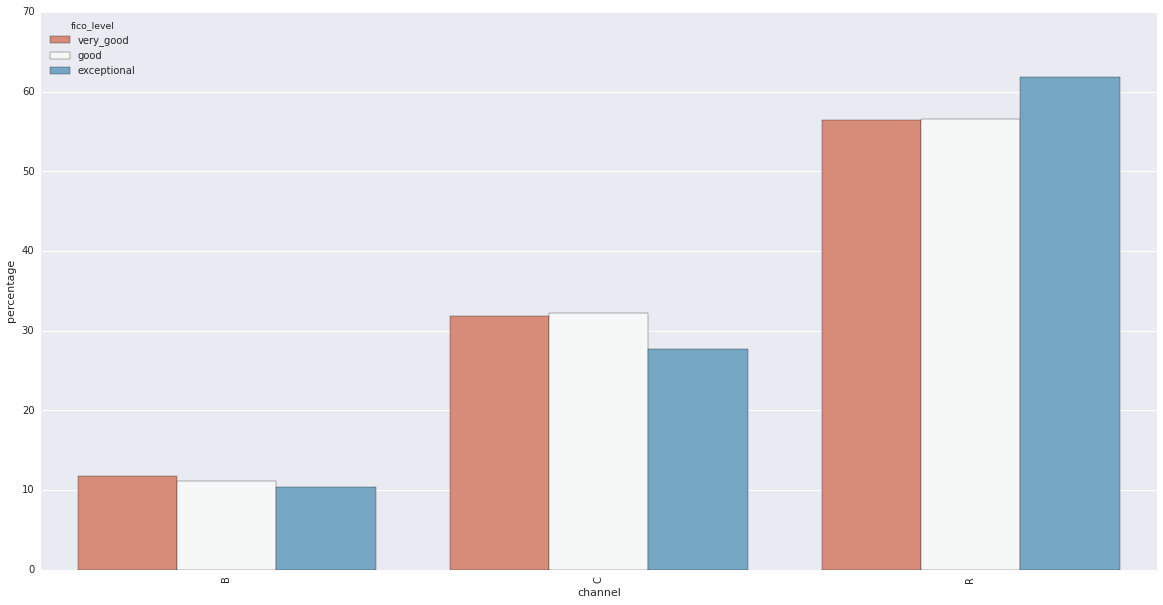

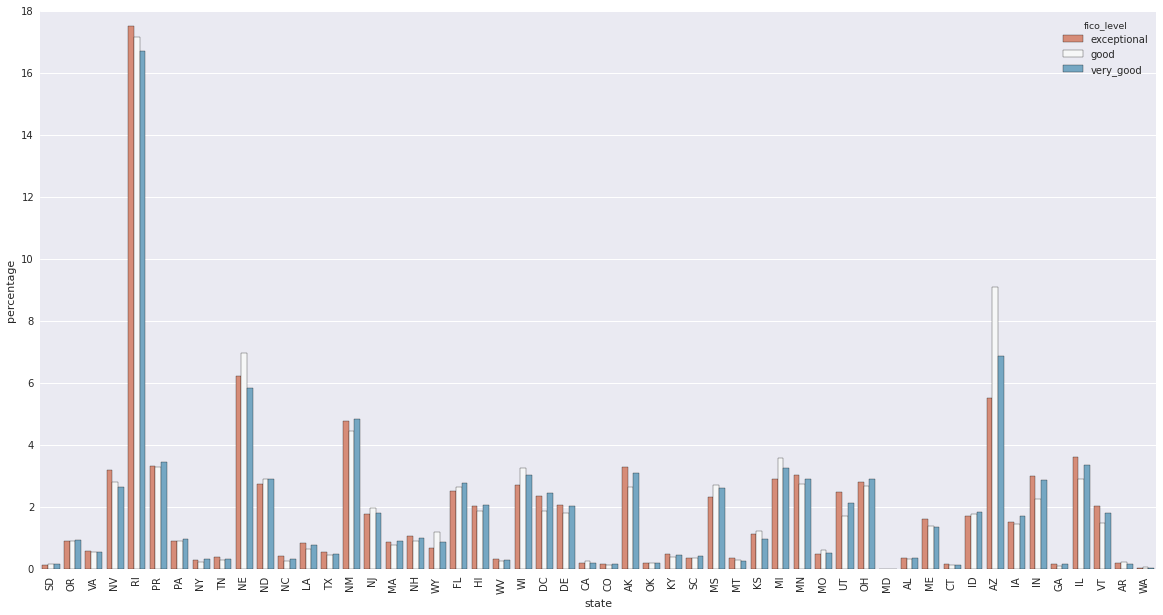

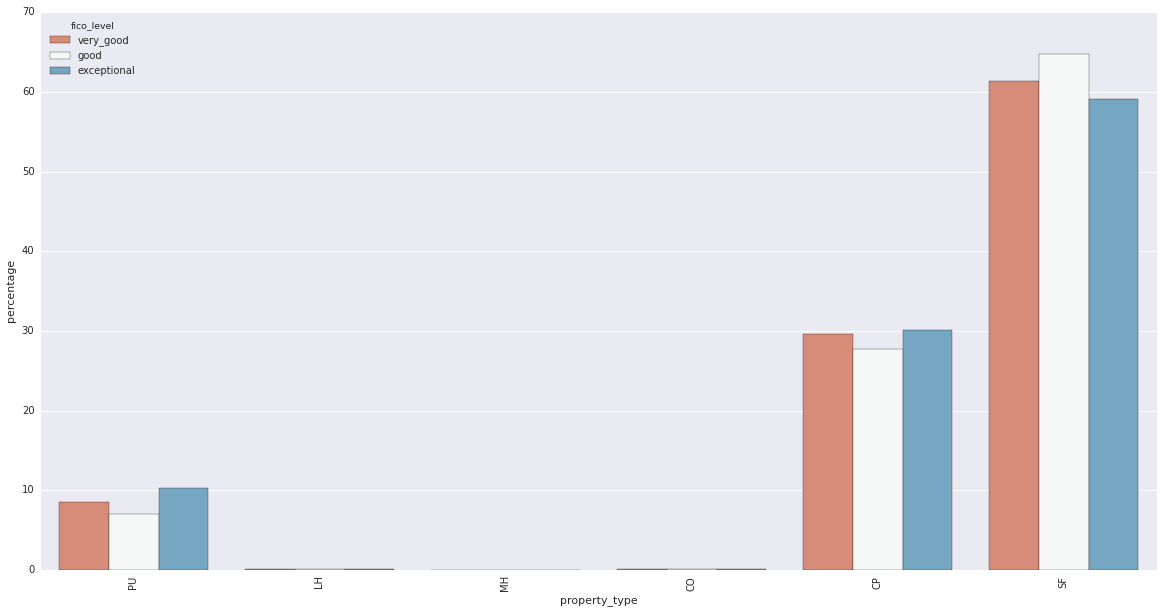

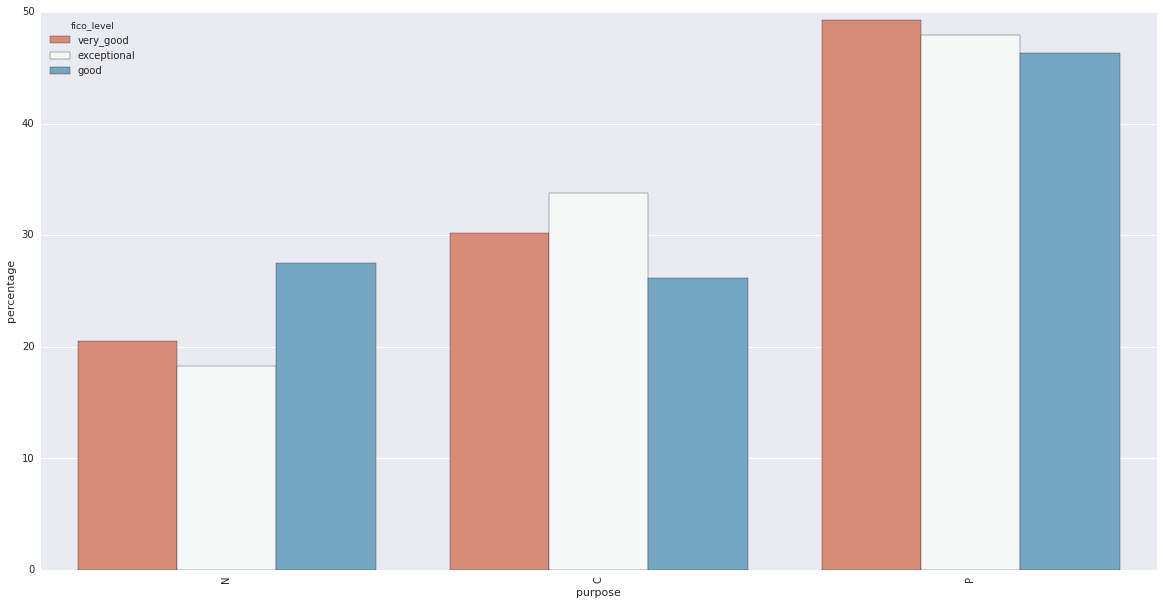

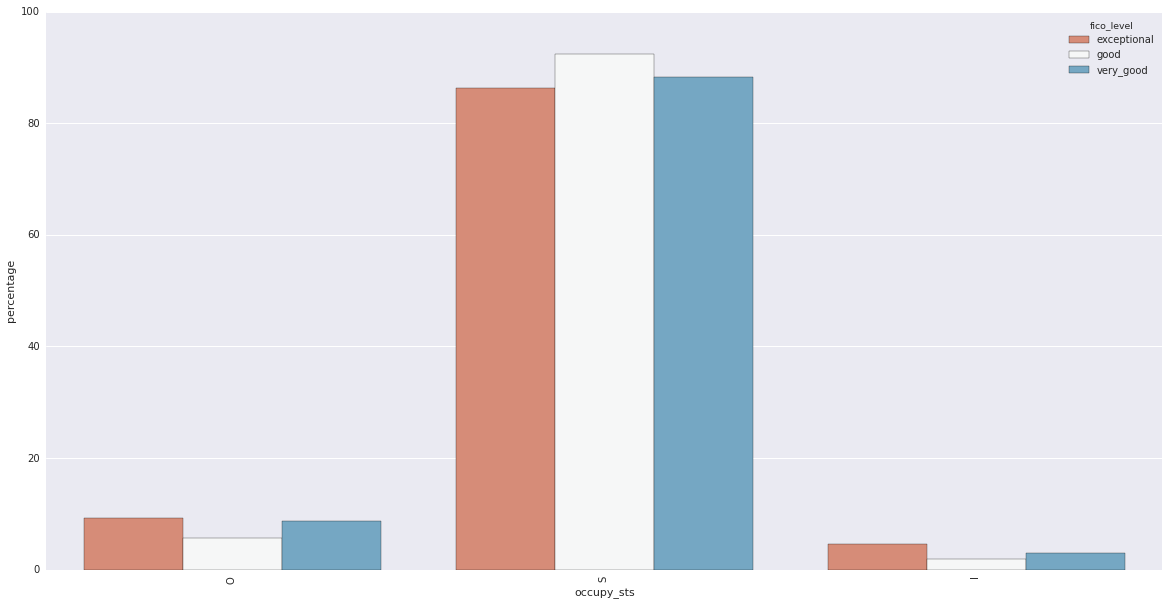

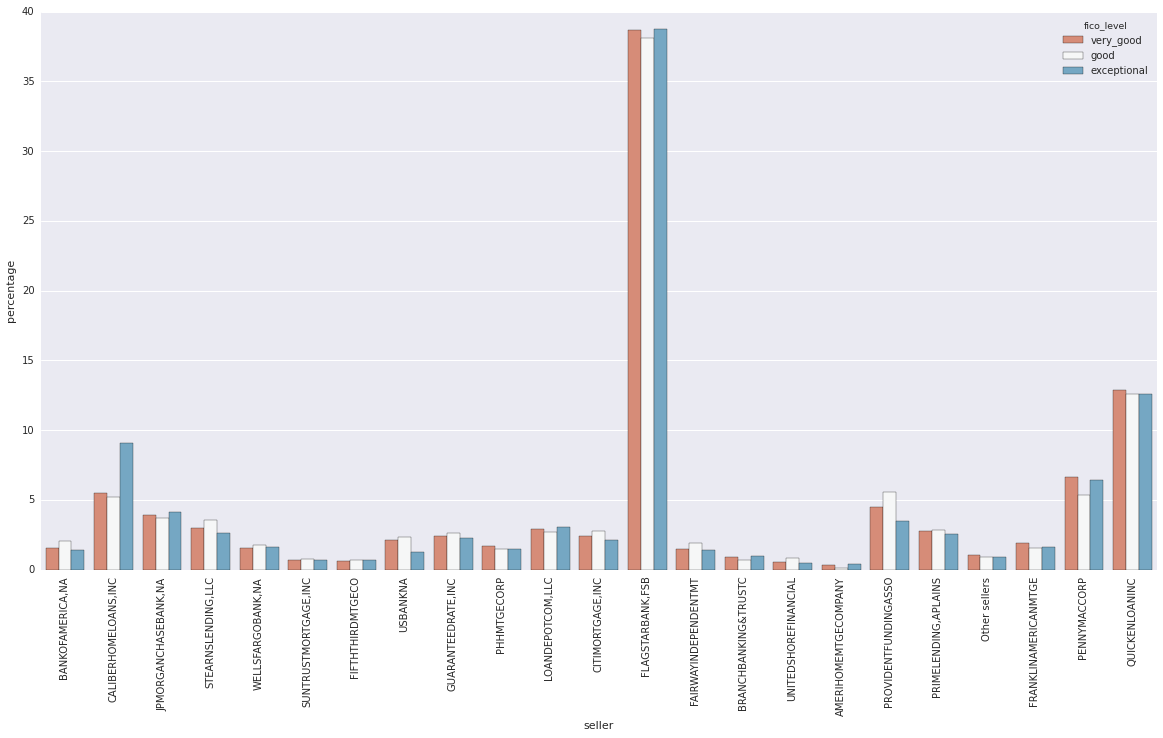

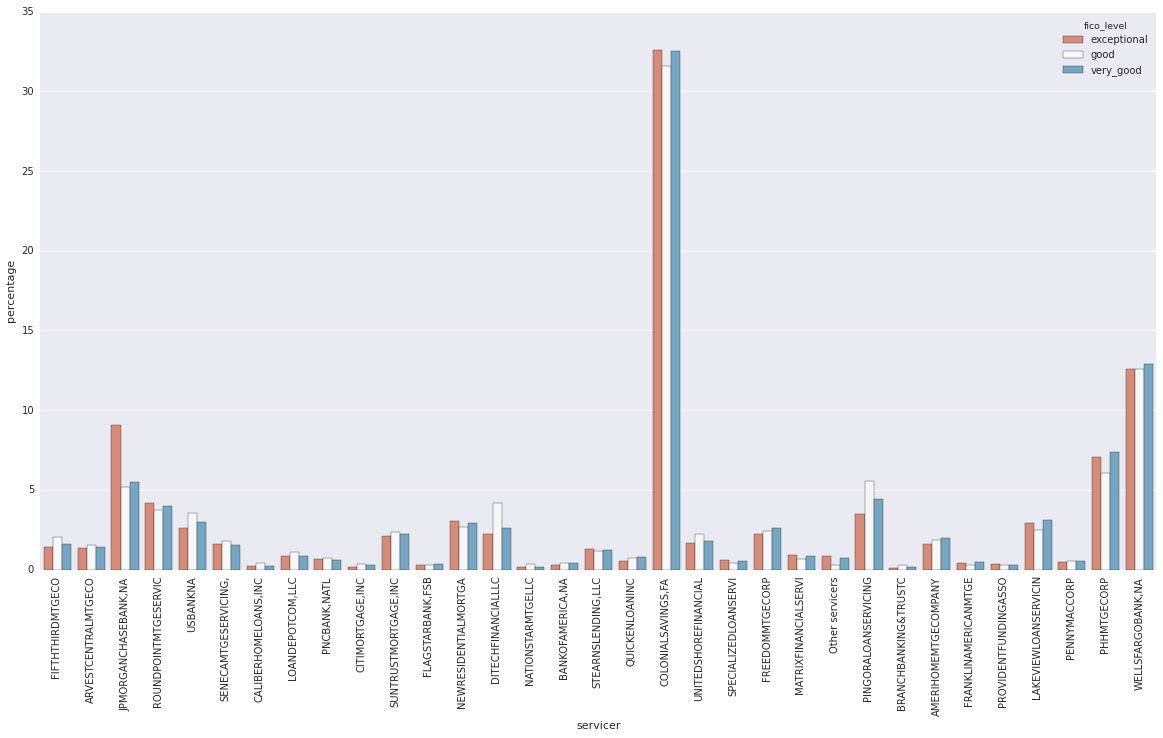

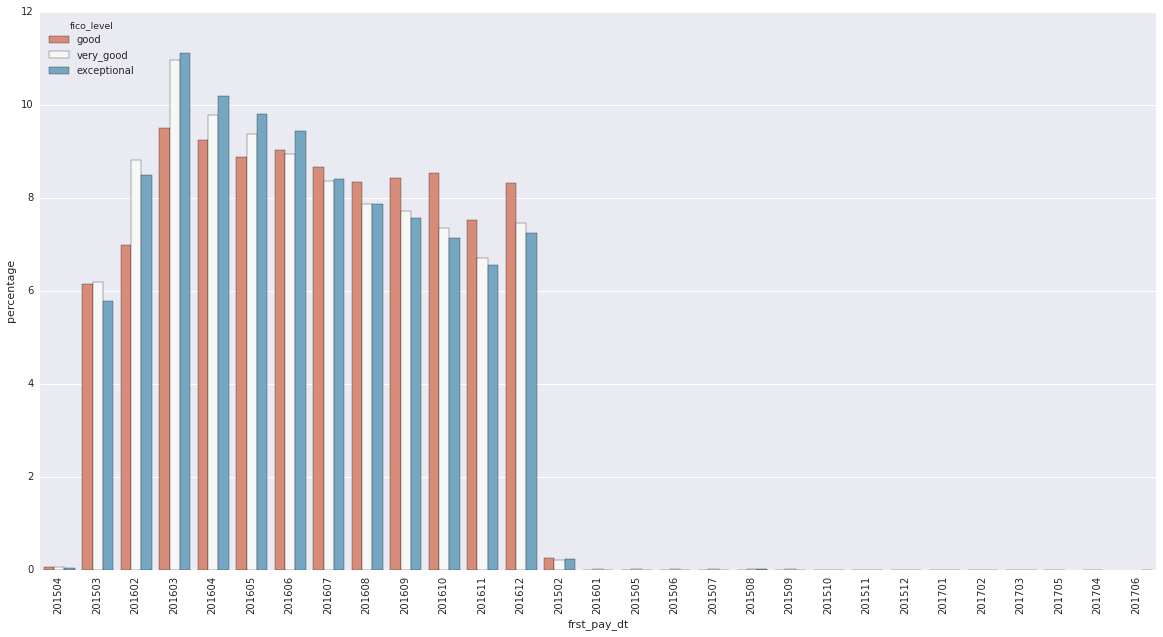

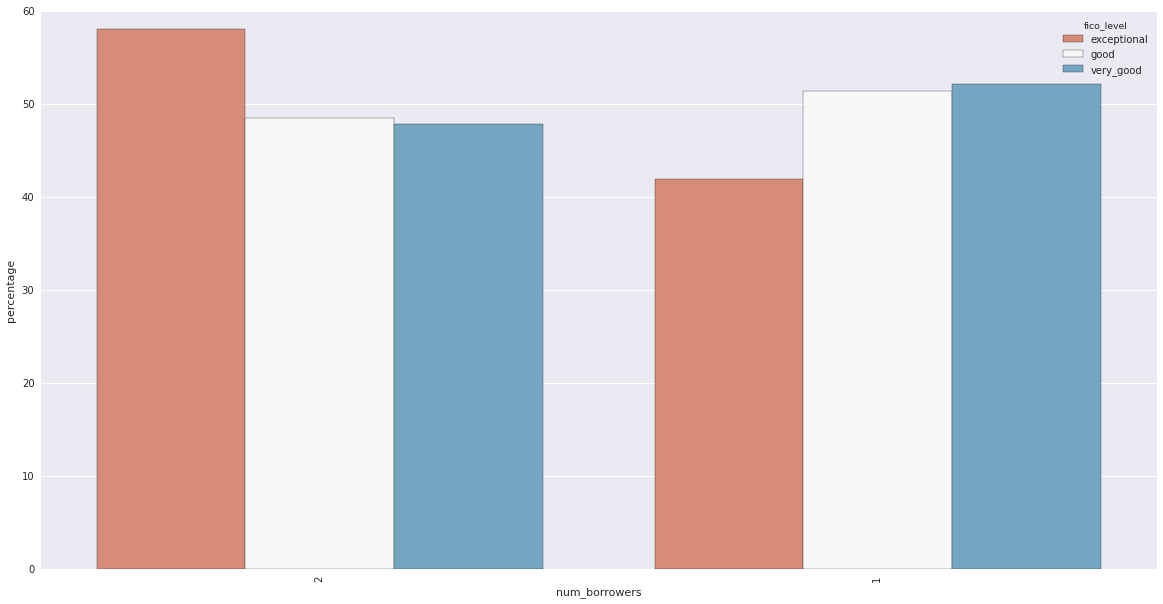

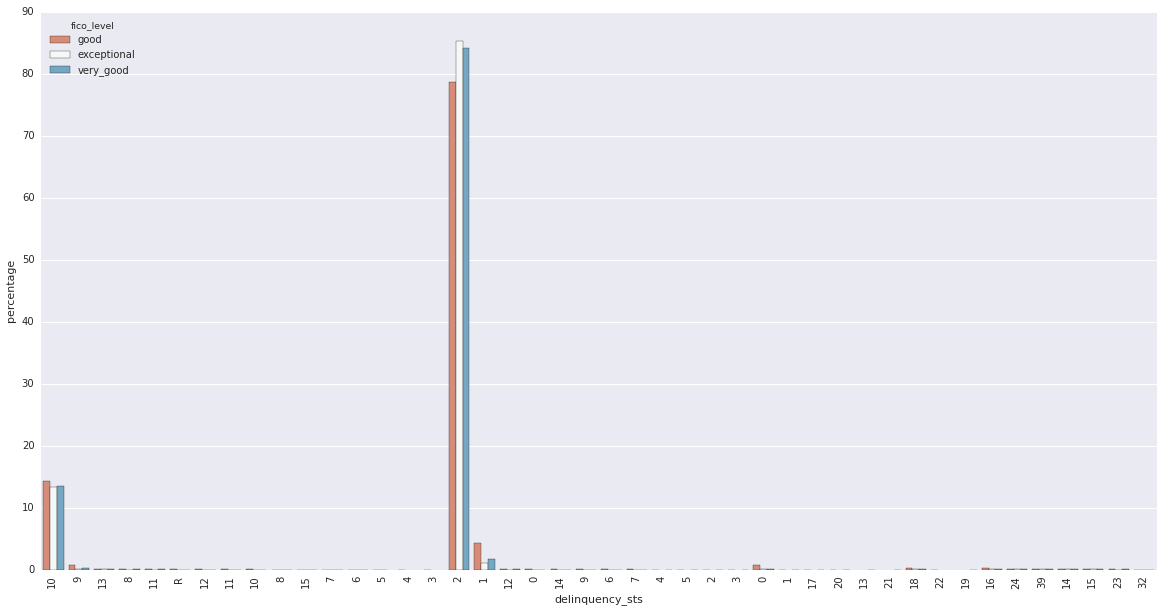

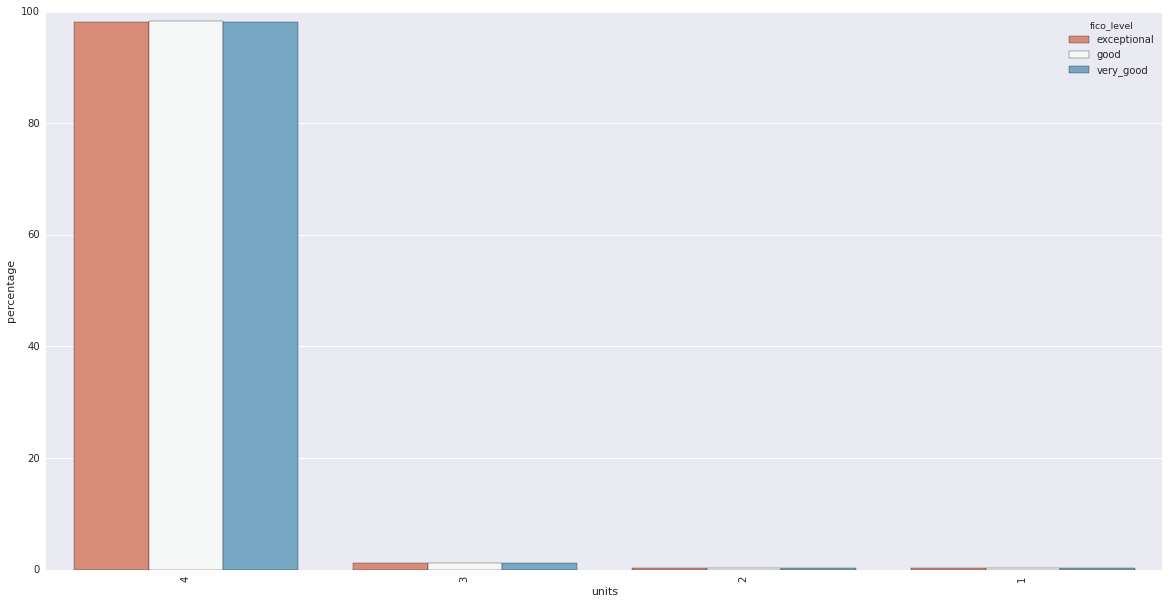

In [13]:
for feature in features:
    percent_categorical(feature, df=data, grouper='fico_level')
